In [37]:
#importing packages
from scipy.stats import norm 
import pandas as pd
import numpy as np
import matplotlib as plt 
import matplotlib.pyplot as plt


%matplotlib inline

In [3]:
ms = pd.read_csv('data/microsoft.csv')

In [4]:
ms.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
1,2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2,2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
3,2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
4,2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


In [5]:
#Convert the 'Date' column to datetime format
ms['Date'] = pd.to_datetime(ms['Date'])

# Set the 'Date' column as the index
ms.set_index('Date', inplace=True)

In [6]:
ms.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


In [7]:
print(ms.shape)

(780, 6)


In [8]:
#showing summary of statistics of Microsoft
ms.describe()

,Open,High,Low,Close,Adj Close,Volume
count,780.000000,780.000000,780.000000,780.000000,780.000000,7.800000e+02
mean,58.912308,59.372308,58.465000,58.945397,56.931553,2.978900e+07
std,12.852040,12.868060,12.802831,12.830350,13.670080,1.522319e+07
min,40.340000,40.740002,39.720001,40.290001,37.267815,7.425600e+06
25%,47.894998,48.295000,47.535001,47.974998,44.792073,2.096685e+07
50%,56.150002,56.640001,55.700001,56.209999,53.775458,2.623125e+07
75%,67.892500,68.174997,67.447500,67.740000,66.565508,3.408020e+07
max,95.139999,96.070000,93.720001,95.010002,94.565781,1.691640e+08


The above shows the statistics of the Microsoft data. 

#### Selecting multpiple columns 

In [9]:
ms[['Open', 'Close']]

,Open,Close
Date,,
2014-12-31,46.730000,46.450001
2015-01-02,46.660000,46.759998
2015-01-05,46.369999,46.330002
2015-01-06,46.380001,45.650002
2015-01-07,45.980000,46.230000
...,...,...
2018-01-30,93.300003,92.739998
2018-01-31,93.750000,95.010002
2018-02-01,94.790001,94.260002


In [10]:
#select all the price information of Microsoft in 2016
ms_2016 = ms.loc['2016-01-01':'2016-12-31']

In [11]:
#print the price of Microsoft on '2016-03-16'
ms_2016.loc['2016-03-16']

Open         5.345000e+01
High         5.460000e+01
Low          5.340000e+01
Close        5.435000e+01
Adj Close    5.187095e+01
Volume       3.169170e+07
Name: 2016-03-16 00:00:00, dtype: float64

In [12]:
ms_2015=ms.loc['2015-01-01':'2015-12-31']

In [13]:
#print the price of Microsoft on '2015-01-07'
ms_2015.loc['2015-01-07']

Open         4.598000e+01
High         4.646000e+01
Low          4.549000e+01
Close        4.623000e+01
Adj Close    4.264582e+01
Volume       2.911410e+07
Name: 2015-01-07 00:00:00, dtype: float64

One can select data for an entire year using loc method. I selected data for 2015 and 2016 and then called out specific data from two different dates in the years. 

### Locating a particular row of data using "Selection by position"

In [14]:
# print the opening price of the first row
print(ms.iloc[0, 0])

46.73


### Plot the stock data using plot() method

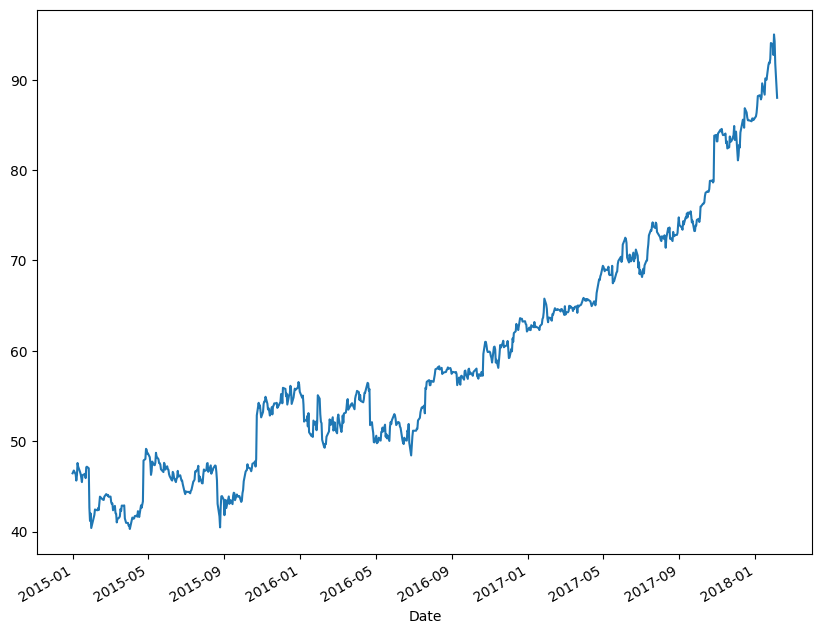

In [15]:
plt.figure(figsize=(10, 8))
ms['Close'].plot()
plt.show()

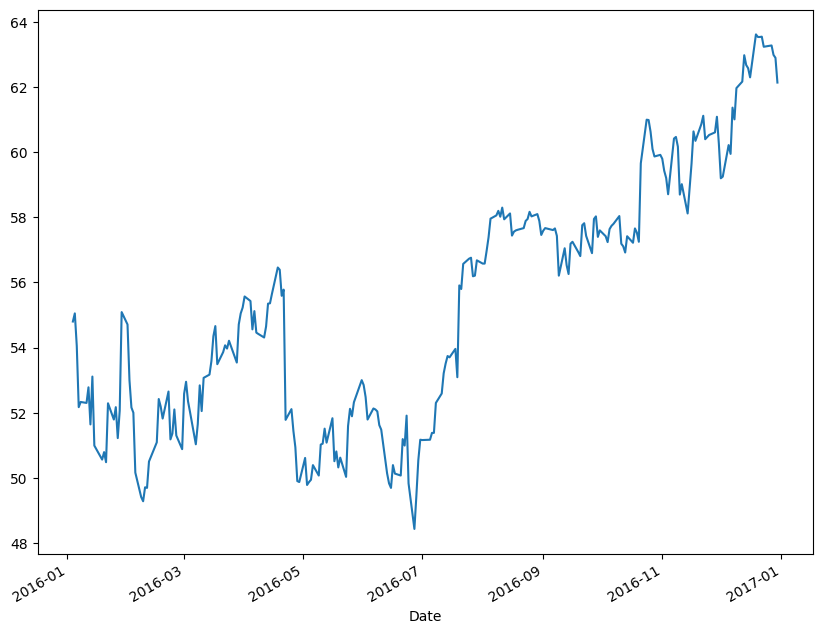

In [16]:
plt.figure(figsize=(10, 8))
# plot only the Close price of 2016 of Microsoft, 1 line 
ms.loc['2016-01-01':'2016-12-31', 'Close'].plot()
plt.show()

The two graphs above display data on Microsoft 

#### Creating New columns

In [17]:
ms['PriceDiff'] = ms['Close'].shift(-1) - ms['Close']

In [18]:
#display diff in Microsoft on 2015-01-05
print(ms['PriceDiff'].loc['2015-01-05'])

-0.6799999999999997


In [19]:
#New column Daily return
ms['Return'] = ms['PriceDiff'] / ms['Close']

In [20]:
#Print return on 2015-01-05
print(ms['Return'].loc['2015-01-05'])

-0.014677314281143345


In [21]:
#Creating a New column using list comprehension - Direction 
ms['Direction'] = [1 if ms['PriceDiff'].loc[ei] > 0 else 0 for ei in ms.index]

In [22]:
#The price diff in 2015-01-05
print('Price Difference on {} is {}. direction is {}'.format('2015-01-05', ms['PriceDiff'].loc['2015-01-05'], ms['Direction'].loc['2015-01-05']))

Price Difference on 2015-01-05 is -0.6799999999999997. direction is 0


In [23]:
#Creating a new column using rolling()
ms['ma60'] = ms['Close'].rolling(50).mean()

#### Plotting the moving average

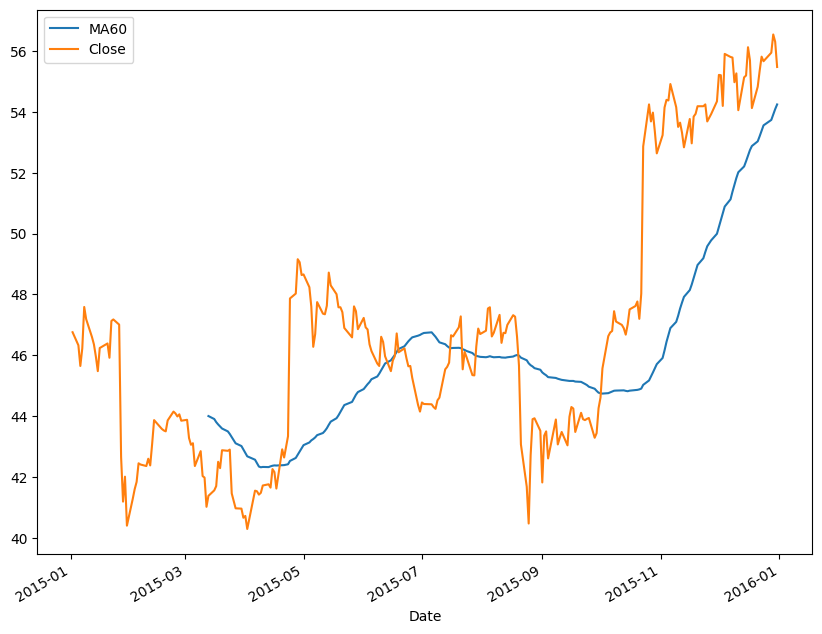

In [24]:
plt.figure(figsize=(10,8))
ms['ma60'].loc['2015-01-01':'2015-12-31'].plot(label='MA60')
ms['Close'].loc['2015-01-01':'2015-12-31'].plot(label='Close')
plt.legend()
plt.show()

In [25]:
#creating fast and slow signals
ms['MA10'] = ms['Close'].rolling(10).mean() #fast signal
ms['MA50'] = ms['Close'].rolling(50).mean()

<Axes: xlabel='Date'>

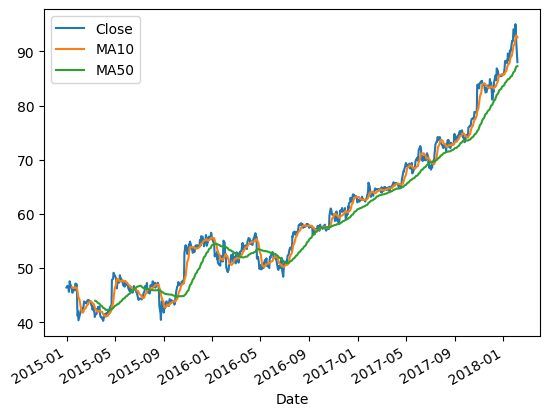

In [26]:
#Plot stock price with two moving averages
ms['Close'].plot(legend=True)
ms['MA10'].plot(legend=True) #fast signal
ms['MA50'].plot(legend=True) #slow signal

In [27]:
#Long or not
ms['Shares'] = [ 1 if ms.loc[ei, 'MA10'] > ms.loc[ei, 'MA50'] else 0 
                for ei in ms.index]

In [28]:
#Daily profit
ms['Close1'] = ms['Close'].shift(-1)
ms.iloc[500:505, :]

,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Return,Direction,ma60,MA10,MA50,Shares,Close1
Date,,,,,,,,,,,,,,
2016-12-23,63.450001,63.540001,62.799999,63.240002,61.569557,12398000,0.039997,0.000632,1,60.4170,63.020000,60.4170,1,63.279999
2016-12-27,63.209999,64.070000,63.209999,63.279999,61.608490,11763200,-0.289997,-0.004583,0,60.5342,63.131000,60.5342,1,62.990002
2016-12-28,63.400002,63.400002,62.830002,62.990002,61.326157,14653300,-0.090000,-0.001429,0,60.6496,63.132000,60.6496,1,62.900002
2016-12-29,62.860001,63.200001,62.730000,62.900002,61.238541,10181600,-0.760003,-0.012083,0,60.7544,63.154001,60.7544,1,62.139999
2016-12-30,62.959999,62.990002,62.029999,62.139999,60.498604,25579900,0.440003,0.007081,1,60.8466,63.110000,60.8466,1,62.580002


In [29]:
#Daily profit 
ms['Profit'] = [ms.loc[ei, 'Close1'] - ms.loc[ei, 'Close']
                if ms.loc[ei, 'Shares'] == 1
                else 0 for ei in ms.index]

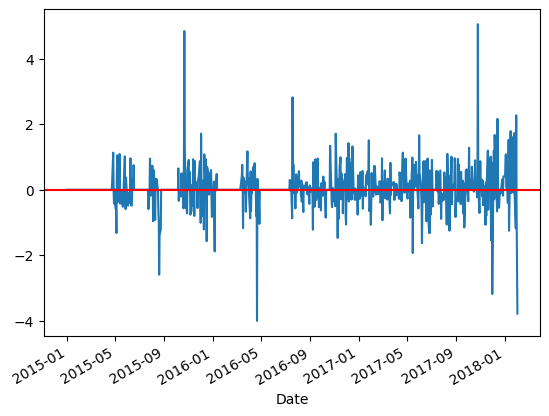

In [30]:
ms['Profit'].plot()
plt.axhline(y=0,color='red')

In [31]:
#Cumulative Wealth
ms['Wealth'] = ms['Profit'].cumsum()
ms.tail()

,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Return,Direction,ma60,MA10,MA50,Shares,Close1,Profit,Wealth
Date,,,,,,,,,,,,,,,,
2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,2.270004,0.024477,1,86.5244,91.862,86.5244,1,95.010002,2.270004,30.540009
2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,-0.750000,-0.007894,0,86.7606,92.349,86.7606,1,94.260002,-0.750000,29.790009
2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,-2.480003,-0.026310,0,86.9978,92.765,86.9978,1,91.779999,-2.480003,27.310006
2018-02-02,93.639999,93.970001,91.500000,91.779999,91.350883,47867800,-3.779999,-0.041185,0,87.1828,92.943,87.1828,1,88.000000,-3.779999,23.530007
2018-02-05,90.559998,93.239998,88.000000,88.000000,87.588554,51031500,NaN,NaN,0,87.2684,92.582,87.2684,1,NaN,NaN,NaN


With cummulative wealth, we get to see if we are making any money or not. 
The tail of the dataframe tells whether we make money or not. 

Total money you win is  23.53000699999999
Total money you win is  46.450001


<Axes: xlabel='Date'>

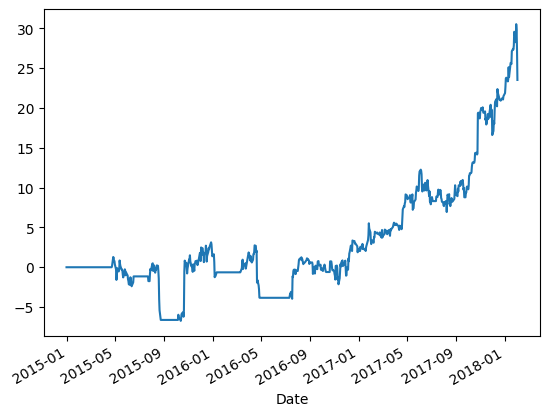

In [32]:
print("Total money you win is ", ms.loc[ms.index[-2],'Wealth'])
print("Total money you win is ", ms.loc[ms.index[0],'Close'])
ms['Wealth'].plot()

In [33]:
ms[['Open', 'Low']]

,Open,Low
Date,,
2014-12-31,46.730000,46.450001
2015-01-02,46.660000,46.540001
2015-01-05,46.369999,46.250000
2015-01-06,46.380001,45.540001
2015-01-07,45.980000,45.490002
...,...,...
2018-01-30,93.300003,92.099998
2018-01-31,93.750000,93.510002
2018-02-01,94.790001,93.580002


## Distribution of Log

In [36]:
#Calculating the log daily return
ms['LogReturn'] = np.log(ms['Close']).shift(-1) - np.log(ms['Close'])

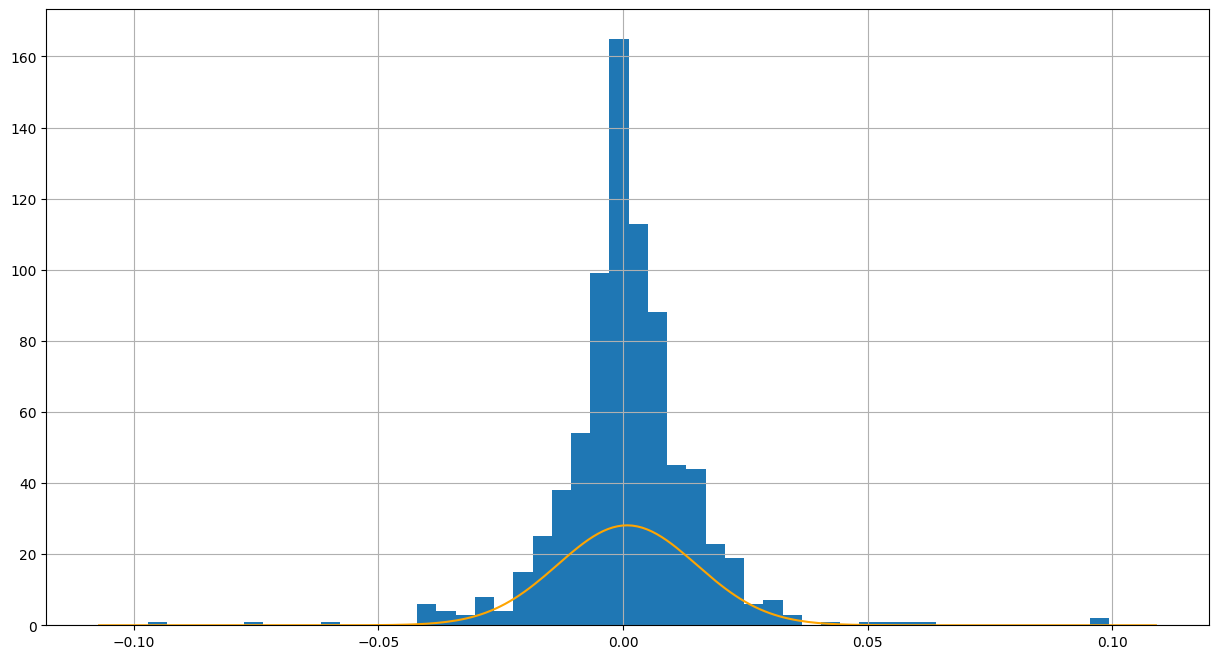

In [42]:
#Plot a histogram to show the distribution of log return of Microsoft's stock

mu = ms['LogReturn'].mean()
sigma = ms['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(ms['LogReturn'].min()-0.01, ms['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

ms['LogReturn'].hist(bins=50, figsize=(15, 8))
plt.plot(density['x'], density['pdf'], color='orange')
plt.show()

From the output, the log return is very close to the mean

### Calculate the probability of the stock price will drop over a certain percentage in a day

In [43]:
# probability that the stock price of microsoft will drop over 5% in a day
prob_return1 = norm.cdf(-0.05, mu, sigma)
print('The probability is ', prob_return1)

The probability is  0.00017118482608677866


### Calculate the probability of the stock price will drop over a certain percentage in a year

In [44]:
#drop over 40% in 220 days
mu220 = 220*mu
sigma220 = (220*0.5) * sigma
print('The probability of dropping over 40% in 2002 days is ', norm.cdf(-0.4, mu220, sigma220))

The probability of dropping over 40% in 2002 days is  0.3550135586071276


### Calculate Value at Risk(VaR)

In [45]:
#Value at risk
VaR = norm.pdf(0.05, mu, sigma)
print('Single day value at risk', VaR)

Single day value at risk 0.0693804811839352


Value at Risk (VaR) is a statistical measure used to assess the risk of loss on a specific portfolio of financial assets. From the above tabulation, the VaR is 0.06938 which equates to approximately 7%. VaR estimates how much a set of investments might lose, with a given probability due to market risk over a set time period under normal market conditions. 

In [46]:
#Quantile
# 5% quantile
print('5% quantile', norm.ppf(0.05, mu, sigma))
print('95% quantile', norm.ppf(0.95, mu, sigma))

5% quantile -0.02252336240706501
95% quantile 0.02416382537931104
